# Hypothesis Testing - 1

- **$H_0$ (Null Hypothesis):** <br>
There is no statistically significant difference in memory representations between individuals with different levels of specificity during learning.
<br>

- **$H_1$ (Alternative Hypothesis):** <br>
There is a statistically significant difference in memory representations between individuals with different levels of specificity during learning.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from scipy.stats import shapiro

#### Reading Data

In [2]:
# reading subject age data
sub_ages = pd.read_csv('../data/e1/e1_sub_ages.csv')

# Reading learning data
learning_data = pd.read_csv('../data/e1/e1_learning_data.csv')

# Reading memory data
memory_data = pd.read_csv('../data/e1/e1_memory_data.csv')

#### Data Processing

In [3]:
sub_ages.head()

,subject_id,age
0,3768,8.04
1,3770,8.10
2,3855,16.83
3,3853,16.94
4,3898,22.15


In [4]:
sub_ages.shape

(151, 2)

In [5]:
learning_data.head()

,subject_id,task_part,block_condition,block_order,task_block,trial_index,stimulus,cat_type,mean_cat_reward,approach_reward,key_press,rt,points,stimulus_repetition,correct_response,correct_response_made
0,3768,learning,2,1,animals,73,images/horse7.png,neutral,0,2,1,1148.0,2,1,1,1.0
1,3768,learning,2,1,animals,75,images/cow5.png,bad,-3,-4,0,347.0,0,1,0,1.0
2,3768,learning,2,1,animals,77,images/cow8.png,bad,-3,-2,1,618.0,-2,1,0,0.0
3,3768,learning,2,1,animals,79,images/horse7.png,neutral,0,2,1,306.0,2,2,1,1.0
4,3768,learning,2,1,animals,81,images/goat6.png,good,5,8,0,1521.0,0,1,1,0.0


In [6]:
learning_data.shape

(46206, 16)

In [7]:
learning_data['subject_id'].nunique()

151

In [8]:
memory_data.head()

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0


In [9]:
memory_data

,subject_id,task_part,block_order,block_condition,category_type,num_stim_rep,image,category,task_block,stim_num,correct_mem_response,mem_response,confidence,rt,mem_acc,conf_number,conf_rating,foil_type,memory_delay
0,3768,memory_trial,1,2,old,6.0,horse7.png,horse,animals,7,old,old,definitely,1866.0,1.0,1.0,4.0,old,7.0
1,3768,memory_trial,1,2,old,6.0,cow5.png,cow,animals,5,old,old,definitely,1792.0,1.0,1.0,4.0,old,7.0
2,3768,memory_trial,1,2,old,3.0,cow8.png,cow,animals,8,old,new,definitely,3074.0,0.0,1.0,1.0,old,7.0
3,3768,memory_trial,1,2,old,6.0,goat6.png,goat,animals,6,old,old,definitely,1411.0,1.0,1.0,4.0,old,7.0
4,3768,memory_trial,1,2,old,3.0,goat5.png,goat,animals,5,old,new,maybe,3348.0,0.0,0.0,2.0,old,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,4045,memory_trial,5,2,old,NaN,tree1.png,tree,plants,1,new,old,definitely,732.6,0.0,1.0,4.0,exemplar,7.0
29180,4045,memory_trial,4,1,old,NaN,plane8.png,plane,vehicles,8,new,old,definitely,961.3,0.0,1.0,4.0,exemplar,7.0
29181,4045,memory_trial,4,1,old,NaN,train3.png,train,vehicles,3,new,old,maybe,1127.0,0.0,0.0,3.0,exemplar,7.0
29182,4045,memory_trial,1,2,new,NaN,bed7.png,bed,furniture,7,new,old,maybe,980.3,0.0,0.0,3.0,category,7.0


In [10]:
memory_data['subject_id'].nunique()

151

## Statistical Tests

**Chi Square Test**: <br>

#### Justification

- Chi-Square Test is used to determine whether there is a statistically significant difference between two categorical variables.
<br>

- Here, `block condition` and `memory accuracy` are two categorical variables.

In [11]:
from scipy.stats import chi2_contingency

# Create a contingency table from the data
contingency_table = pd.crosstab(memory_data['block_condition'], memory_data['mem_acc'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)


Chi-Square Statistic: 5.278350502430847
P-value: 0.021592194513968745


**Effect Size - Cramer's V:**

In [12]:
# Calculate Cramer's V for effect size
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print("Cramer's V (Effect Size):", cramer_v)

Cramer's V (Effect Size): 0.01345504461127956


#### Visualization

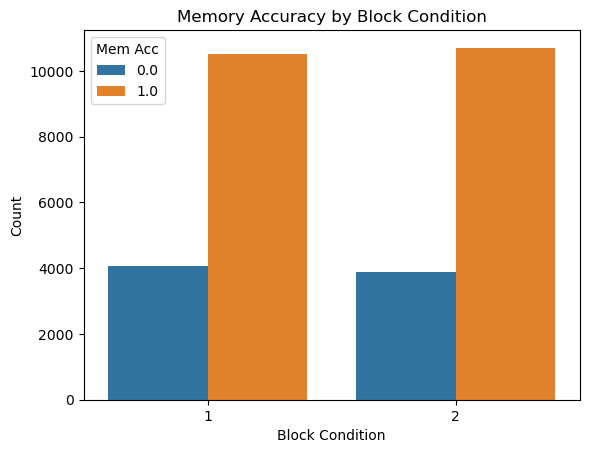

In [13]:
# Plotting a bar chart of memory accuracy by block condition
sns.countplot(x='block_condition', hue='mem_acc', data=memory_data)
plt.title('Memory Accuracy by Block Condition')
plt.xlabel('Block Condition')
plt.ylabel('Count')
plt.legend(title='Mem Acc')
plt.show()

#### Observations

- The `chi-square test` yielded a statistic of $\chi^2 = 5.28$ with a corresponding `p-value` of $p = 0.022$. This indicates that there is a statistically significant association between block condition and memory accuracy at the $\alpha = 0.05$ level.

<br>

- Furthermore, the `effect size`, measured using `Cramer's V`, was found to be $V = 0.0135$. While this value is relatively small, it does suggest a weak association between block condition and memory accuracy.

<br>

- This can be observed in the `count plot` as well 

### Considering Confidence Level along with Accuracy

**Chi-Square Test**:

In [16]:
from scipy.stats import chi2_contingency

# Create a contingency table from the data
contingency_table = pd.crosstab(memory_data['mem_acc'], [memory_data['block_condition'], memory_data['conf_number']])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)


Chi-Square Test Results:
Chi-Square Statistic: 965.1383254159358
P-value: 6.569913110795412e-209


#### Observations
- The chi-square test results indicate a highly significant relationship between `memory accuracy`, specificity during learning i.e `block_condition`, and `confidence level` i.e conf_number. 

<br>

- The large chi-square statistic value $965.138$ and the very low p-value (approximately $6.57e-209$) suggest that there is a strong association between these variables.

### Adding a New Ordinal Column (Confidence Level + Accuracy)

In [1]:
# new column with weighted values based on mem_acc and conf_number
def assign_weight(row):
    if row['mem_acc'] == 1 and row['conf_number'] == 1:
        return 3  # High weight for correct with high confidence
    elif row['mem_acc'] == 1 and row['conf_number'] == 0:
        return 2  # Medium weight for correct with low confidence
    elif row['mem_acc'] == 0 and row['conf_number'] == 1:
        return 1  # Low weight for incorrect with high confidence
    else:
        return 0  # No weight for incorrect with low confidence

In [23]:
memory_data['weighted_memory'] = memory_data.apply(assign_weight, axis=1)

### Normality Test

**Shapiro-Wilk Test**:

In [24]:
shapiro_stat, shapiro_p_val = shapiro(memory_data['weighted_memory'])
print("Shapiro-Wilk Test - Statistic:", shapiro_stat)
print("Shapiro-Wilk Test - P-value:", shapiro_p_val)

Shapiro-Wilk Test - Statistic: 0.7727035880088806
Shapiro-Wilk Test - P-value: 0.0


/home/shreeya/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Observations
   - Statistic: $0.7727035880088806$
   - P-value: $0.0$
   <br>

   - The Shapiro-Wilk test assesses the normality of the weighted memory variable. The low p-value indicates that the data significantly deviates from a normal distribution, suggesting non-normality.

### Homogenity Test:

**Levene's Test**:

In [26]:
from scipy.stats import shapiro, levene
levene_stat, levene_p_val = levene(memory_data[memory_data['block_condition'] == 1]['weighted_memory'],
                                   memory_data[memory_data['block_condition'] == 2]['weighted_memory'])
print("Levene's Test - Statistic:", levene_stat)
print("Levene's Test - P-value:", levene_p_val)

Levene's Test - Statistic: 0.12295450987633995
Levene's Test - P-value: 0.7258544481564158


#### Observations
   - Statistic: $0.12295450987633995$
   - P-value: $0.7258544481564158$
   <br>

   - Levene's test checks the homogeneity of variances between block conditions in terms of weighted memory. The high p-value suggests that there is no significant difference in variances between the groups.

#### Mann-Whitney U Test

**Mann-Whitney U Test**:

In [28]:
from scipy.stats import mannwhitneyu

# Separate mem_acc data based on block conditions
block_condition_1 = memory_data[memory_data['block_condition'] == 1]['weighted_memory']
block_condition_2 = memory_data[memory_data['block_condition'] == 2]['weighted_memory']

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(block_condition_1, block_condition_2)

print("Mann-Whitney U Statistic:", u_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference in memory accuracy between block conditions.")
else:
    print("There is not enough evidence to conclude a statistically significant difference based on the chosen significance level.")


Mann-Whitney U Statistic: 103571476.0
P-value: 1.557589476059558e-05
There is a statistically significant difference in memory accuracy between block conditions.


#### Observations

   - Statistic: $103571476.0$
   - P-value: $1.557589476059558 \times 10^{-5}$
   <br>
   
   - The Mann-Whitney U test compares the median scores of weighted memory between two block conditions. The **low p-value** (below $0.05$) suggests a statistically significant difference in memory accuracy between block conditions.

> Mann-Whitney U test indicate a significant difference in memory-related variables between the two block conditions. This suggests that the block condition has an impact on how memory is represented or recalled, as evidenced by the differences in weighted memory and memory accuracy.